In [1]:
import glob, json, random
import numpy as np
import pandas as pd
from scipy.stats import entropy
import sklearn.decomposition
import sklearn.manifold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')
from lib import *

sys.path.append('/home/andreas/drop/projects_ongoing/pepeval/')
import pepeval

from pathlib import Path
plt.style.use(Path('../peptidome.mplstyle'))

/media/andreas/data/repos/peptidome/code/netmhc/../lib/main.py:419: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def mcmcsampler(x0, energy, jump, nsteps=1000, nburnin=0, nsample=1):


In [2]:
datadir_maxent = '/home/andreas/drop/data/peptidome/maxent/'
proteome = 'Humanviruses'
k = 9
nkmers = 500000

In [3]:
human_kmers = load_matrix(datadir_maxent+'Human_test_k{k}_matrix.csv.gz'.format(k=k))
pathogen_kmers = load_matrix(datadir_maxent+'{proteome}_test_k{k}_matrix.csv.gz'.format(proteome=proteome, k=k))

In [4]:
human_kmers_str = random.sample(matrix_to_kmers(human_kmers), nkmers)
pathogen_kmers_str = random.sample(matrix_to_kmers(pathogen_kmers), nkmers)

In [5]:
energy = pepeval.load_energy('/home/andreas/drop/projects_ongoing/pepeval/data/Human_nskewfcov_k9_params.npz')

In [6]:
energy_human = np.array([energy(s) for s in human_kmers_str])
energy_pathogen = np.array([energy(s) for s in pathogen_kmers_str])

In [7]:
with open('data/human.txt', 'w') as f:
    for item in human_kmers_str:
        f.write("%s\n" % item)

In [8]:
with open('data/pathogen.txt', 'w') as f:
    for item in pathogen_kmers_str:
        f.write("%s\n" % item)

In [9]:
from lib.netmhcrunutils import run_netMHC

In [10]:
dfhla = pd.read_csv(datadir+'hlas.csv', sep='\t', skiprows=1)
hlas = dfhla['name']
hlas.tail(50)

31    HLA-A6801
32    HLA-A6802
33    HLA-A6823
34    HLA-A6901
35    HLA-A8001
36    HLA-B0702
37    HLA-B0801
38    HLA-B0802
39    HLA-B0803
40    HLA-B1402
41    HLA-B1501
42    HLA-B1502
43    HLA-B1503
44    HLA-B1509
45    HLA-B1517
46    HLA-B1801
47    HLA-B2705
48    HLA-B2720
49    HLA-B3501
50    HLA-B3503
51    HLA-B3801
52    HLA-B3901
53    HLA-B4001
54    HLA-B4002
55    HLA-B4013
56    HLA-B4201
57    HLA-B4402
58    HLA-B4403
59    HLA-B4501
60    HLA-B4601
61    HLA-B4801
62    HLA-B5101
63    HLA-B5301
64    HLA-B5401
65    HLA-B5701
66    HLA-B5801
67    HLA-B5802
68    HLA-B7301
69    HLA-B8301
70    HLA-C0303
71    HLA-C0401
72    HLA-C0501
73    HLA-C0602
74    HLA-C0701
75    HLA-C0702
76    HLA-C0802
77    HLA-C1203
78    HLA-C1402
79    HLA-C1502
80    HLA-E0101
Name: name, dtype: object

In [20]:
dfhla = pd.read_csv(datadir+'hlas_netmhc_9mers.csv')
dfhla = dfhla[dfhla['Binders']>50]
hlas = list(dfhla['Allele'])
hlas

['HLA-A0101',
 'HLA-A0201',
 'HLA-A0202',
 'HLA-A0203',
 'HLA-A0206',
 'HLA-A0211',
 'HLA-A0212',
 'HLA-A0216',
 'HLA-A0217',
 'HLA-A0219',
 'HLA-A0250',
 'HLA-A0301',
 'HLA-A1101',
 'HLA-A2301',
 'HLA-A2402',
 'HLA-A2403',
 'HLA-A2501',
 'HLA-A2601',
 'HLA-A2602',
 'HLA-A2603',
 'HLA-A2902',
 'HLA-A3001',
 'HLA-A3002',
 'HLA-A3101',
 'HLA-A3201',
 'HLA-A3207',
 'HLA-A3215',
 'HLA-A3301',
 'HLA-A6801',
 'HLA-A6802',
 'HLA-A6823',
 'HLA-A6901',
 'HLA-A8001',
 'HLA-B0702',
 'HLA-B0801',
 'HLA-B1501',
 'HLA-B1502',
 'HLA-B1503',
 'HLA-B1517',
 'HLA-B1801',
 'HLA-B2705',
 'HLA-B2720',
 'HLA-B3501',
 'HLA-B3801',
 'HLA-B3901',
 'HLA-B4001',
 'HLA-B4002',
 'HLA-B4013',
 'HLA-B4402',
 'HLA-B4403',
 'HLA-B4501',
 'HLA-B4601',
 'HLA-B4801',
 'HLA-B5101',
 'HLA-B5301',
 'HLA-B5401',
 'HLA-B5701',
 'HLA-B5801',
 'HLA-C0303',
 'HLA-C0501',
 'HLA-C0602',
 'HLA-C0702',
 'HLA-C1203',
 'HLA-C1402',
 'HLA-C1502']

In [12]:
#hlas = ['HLA-B2705', 'HLA-B5101', 'HLA-C0602']
# HLA-B*27, HLA-B*51, and HLA-C*06 https://www.frontiersin.org/articles/10.3389/fimmu.2017.01475/full

In [22]:
for hla in hlas:
    run_netMHC('data/human.txt', 'data/human', hla, binder_only=True)
    run_netMHC('data/pathogen.txt', 'data/pathogen', hla, binder_only=True)

/media/andreas/data/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /media/andreas/data/repos/peptidome/code/netmhc/data/human.txt -xls -xlsfile /media/andreas/data/repos/peptidome/code/netmhc/data/human-HLA-A3207.csv -a HLA-A3207


FileNotFoundError: [Errno 2] No such file or directory: '/media/andreas/data/repos/peptidome/code/netmhc/data/human-HLA-A3207.csv'

In [23]:
energies = {}
energies['h_all'] = energy_human
energies['p_all'] = energy_pathogen
for hla in hlas:
    for proteome in ['human', 'pathogen']:
        try:
            df = pd.read_csv(f'data/{proteome}-{hla}.csv', sep=',', index_col=0)
            energies[f'{proteome[0]}_{hla}'] = df['Peptide'].apply(energy)
            print(hla, proteome, len(df), np.mean(energies[f'{proteome[0]}_{hla}']))
        except FileNotFoundError:
            pass

HLA-A0101 human 1974 -2.001077409238634
HLA-A0101 pathogen 2589 -1.7730075861369723
HLA-A0201 human 3666 -2.8536182416128457
HLA-A0201 pathogen 4214 -2.5561948904928764
HLA-A0202 human 3791 -3.073979074510306
HLA-A0202 pathogen 4193 -2.888900886993388
HLA-A0203 human 3627 -2.9964643656839436
HLA-A0203 pathogen 4408 -2.814292675758321
HLA-A0206 human 4394 -2.685523225294342
HLA-A0206 pathogen 4903 -2.500409068231086
HLA-A0211 human 6677 -2.535478945003894
HLA-A0211 pathogen 7523 -2.255202908935776
HLA-A0212 human 6298 -2.718640487053583
HLA-A0212 pathogen 6961 -2.4358633560203584
HLA-A0216 human 6925 -2.654102594850659
HLA-A0216 pathogen 7608 -2.3740859877957377
HLA-A0217 human 3612 -3.091491649946548
HLA-A0217 pathogen 3745 -2.67212285721179
HLA-A0219 human 5875 -2.925998397837695
HLA-A0219 pathogen 6496 -2.6237407210909165
HLA-A0250 human 7337 -2.3847997619915233
HLA-A0250 pathogen 7745 -2.076516446439727
HLA-A0301 human 2607 -2.372230419761318
HLA-A0301 pathogen 2802 -2.1398235072281

h_all 3818.9600074390546
p_all 1222.7852915731175
h_HLA-A2301 13.213158652650685
p_HLA-A2301 17.951180071701774
h_HLA-B2705 64.38747885970375
p_HLA-B2705 80.22617020279475


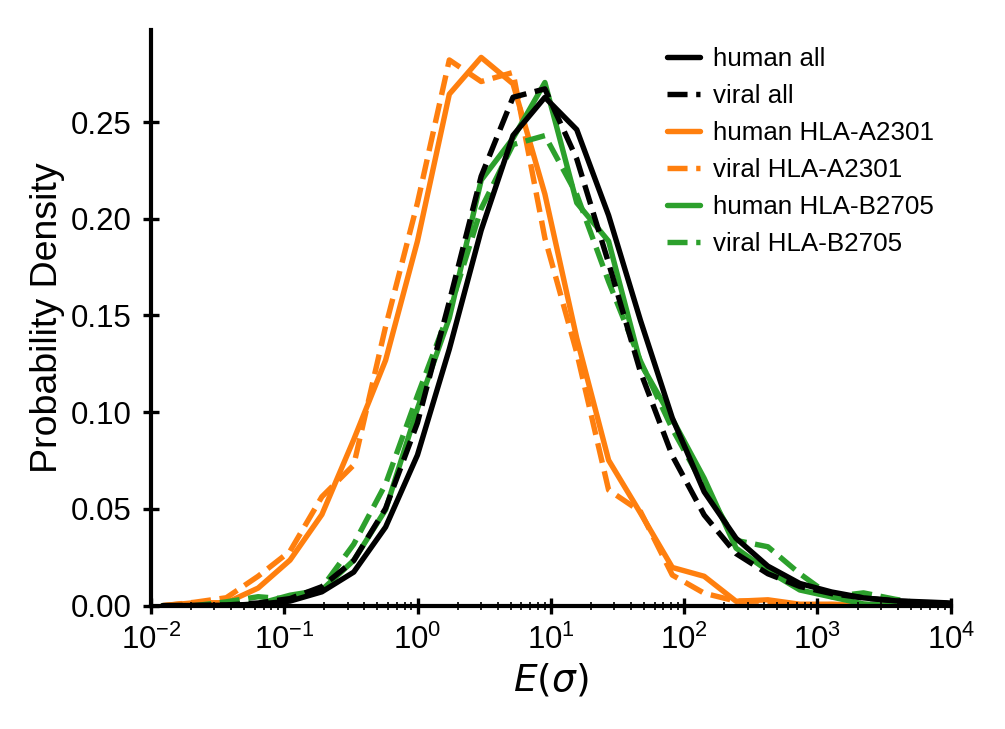

In [26]:
models = energies.keys()
fig, ax = plt.subplots(figsize=(3.42, 2.5))
xmax = max([max(energies[model]) for model in models])+0.05
xmin = min([min(energies[model]) for model in models])-0.05
nbins = 40
scaley = nbins/(xmax-xmin)
bins = np.logspace(-xmax, -xmin, num=nbins+1, base=np.exp(1))
color_dict = {'h_all':'k', 'p_all':'k',
              'h_HLA-A2301':'C1', 'p_HLA-A2301':'C1',
              'h_HLA-B2705':'C2', 'p_HLA-B2705':'C2',
              'h_HLA-C0602':'C3', 'p_HLA-C0602':'C3',
             }
for model in models:
    if 'HLA' in model and not ('A2301' in model or 'B2705' in model):# or 'C0602' in model):
        continue
    values = np.exp(-energies[model])
    print(model, np.mean(np.exp(-energies[model])))
    counts, bins = np.histogram(values, bins=bins)
    counts = (counts+1e-2)/np.sum(counts)
    ax.plot(bins[:-1], counts*scaley,
            label=('human ' if model.startswith('h') else 'viral ') + model[2:], ls='--' if model.startswith('p_') else '-',
            color=color_dict[model],
            zorder=1 if 'all' in model else 0)
ax.set_xscale('log')
ax.set_xlabel(r'$E(\sigma)$')
ax.set_xlim(min(bins), max(bins))
ax.set_ylabel('Probability Density')
ax.set_ylim(0.0)
ax.set_xlim(1e-2, 1e4)
ax.legend(loc='upper right', fontsize='x-small')
fig.tight_layout()
fig.savefig('hla_shifts.pdf')

In [29]:
import pyrepseq.plotting as pp
import logomaker

In [30]:
background = logomaker.alignment_to_matrix(human_kmers_str)

In [52]:
freqs = (background/background.sum(axis=1)[0]).mean(axis=0)
freqs

A    0.069602
C    0.022827
D    0.047827
E    0.071415
F    0.036648
G    0.065303
H    0.026310
I    0.043698
K    0.057480
L    0.099887
M    0.019939
N    0.036364
P    0.062832
Q    0.047695
R    0.056247
S    0.083858
T    0.053296
V    0.059980
W    0.012182
Y    0.026609
dtype: float64

HLA-A2301 6 0.04261203703703703
HLA-B2705 2 0.07806722222222222


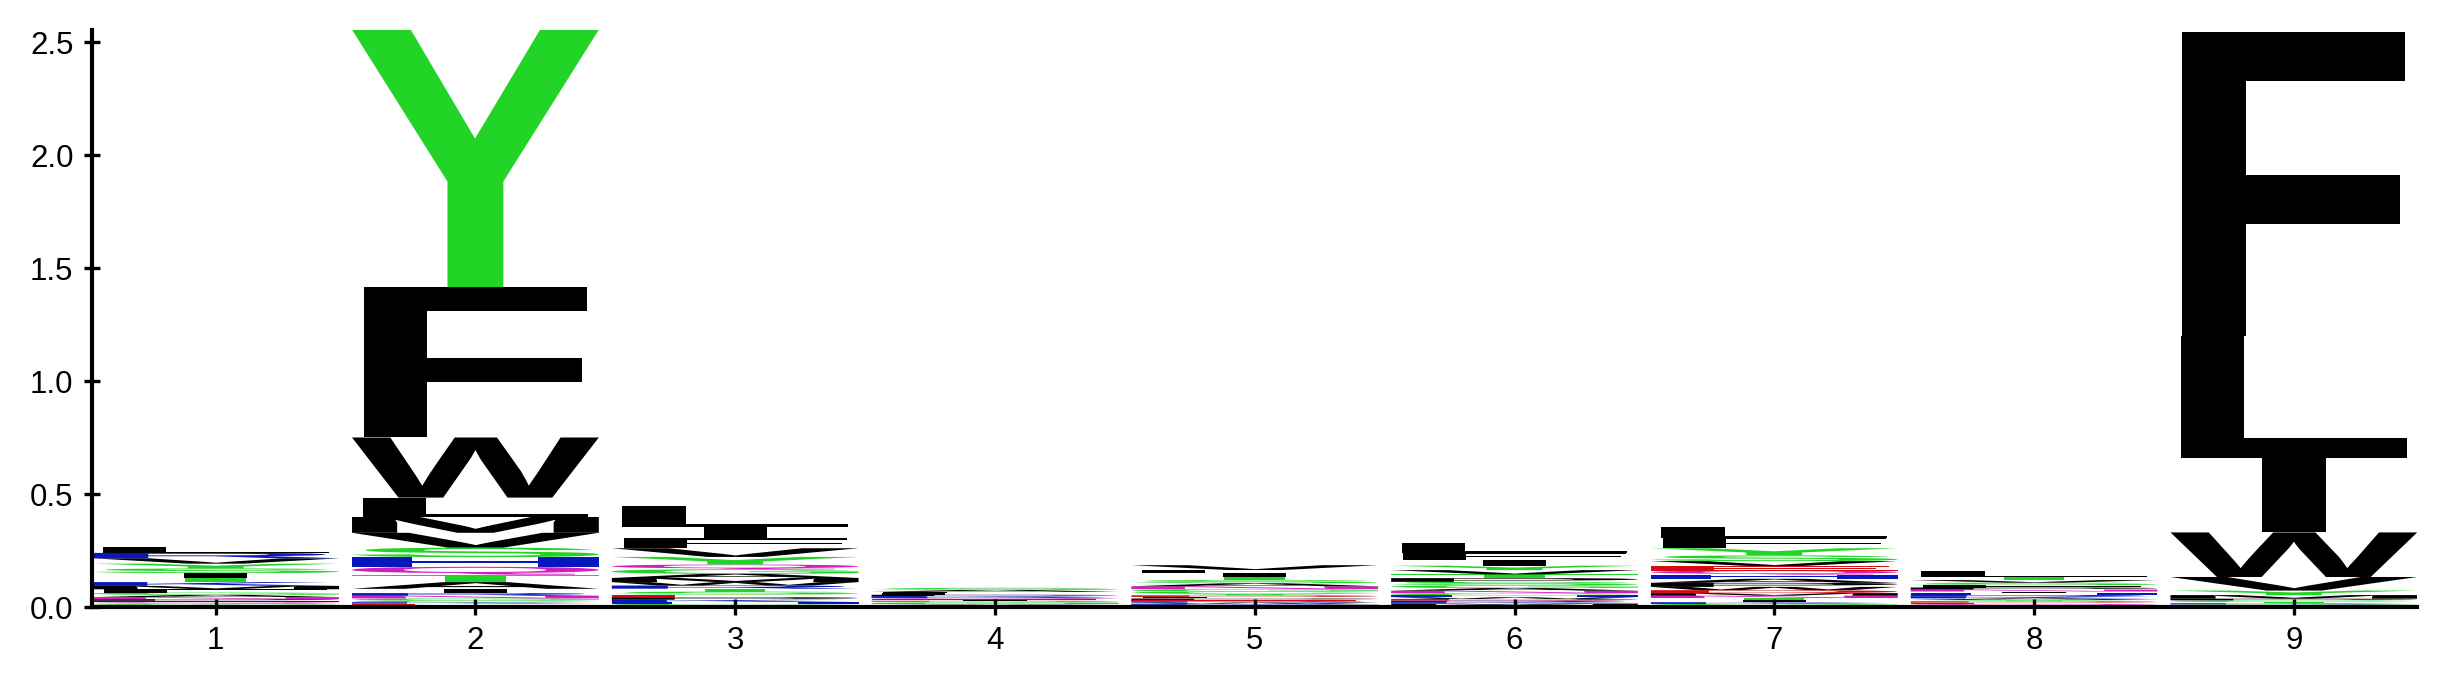

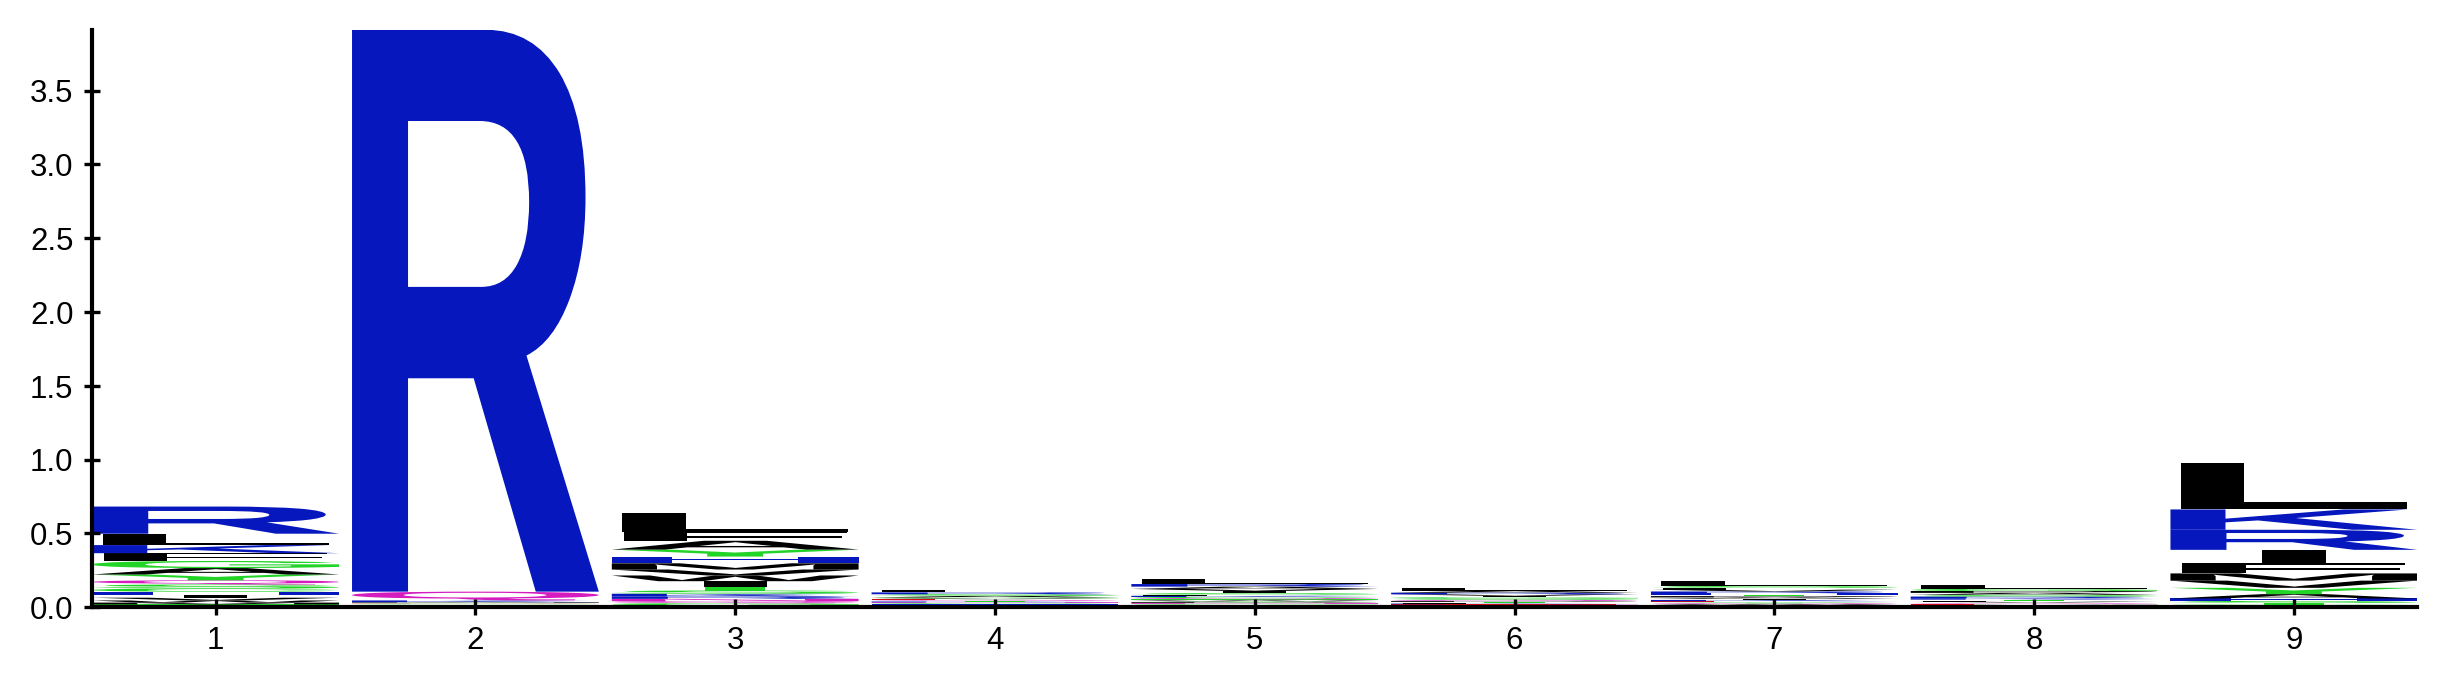

In [78]:
proteome = 'human'
for hla in ['HLA-A2301', 'HLA-B2705']:
    df = pd.read_csv(f'data/{proteome}-{hla}.csv', sep=',', index_col=0)
    information = logomaker.transform_matrix(logomaker.alignment_to_matrix(df['Peptide']),
                                                     from_type='counts', to_type='information',
                                                     background=background)
    information.index += 1
    logo = logomaker.Logo(information)
    anchors = (information>0.2).sum(axis='rows')
    print(hla, anchors.sum(), (freqs * anchors).sum()/anchors.sum())